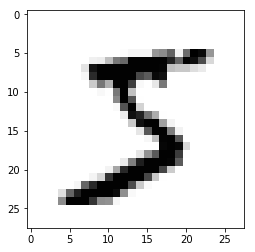

In [5]:
import numpy
import matplotlib.pyplot
%matplotlib inline
 
#데이터를 불러오고 그 파일을 읽는다.
data_file = open("mnist_train_100.csv",'r')
data_list = data_file.readlines()
data_file.close()
 
all_values = data_list[0].split(',') #split는 구분자로 사용할 기호를 그 매개변수로 가진다. 리스트를 불러와서 쉼표로 구분하여 분리
#asfarray는 문자열을 실수로 변환한 다음에 그 숫자로 구성된 배열을 생성한다.
#reshape((28,28))함수는 784개의 어레이 숫자들을 28 x 28 형태의 정방 행렬로 만들어 준다
image_array = numpy.asfarray(all_values[1:]).reshape((28,28)) #리스트의 원소중 가장 첫 번째 원소는 이 원소들이 무엇을 표현하는 것인지를 알려주는 것이기 때문에 빼준다.
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None') #imshow를 이용해 어레이를 시각화

performance =  0.6
0


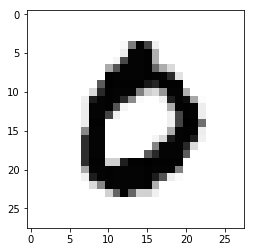

In [3]:

import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline


# neural network class definition
# http://blog.naver.com/PostView.nhn?blogId=beodeulpiri&logNo=221025358671&parentCategoryNo=&categoryNo=&viewDate=&isShowPopularPosts=false&from=postView
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
	# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)
# load the mnist training data CSV file into a list
training_data_file = open("mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# train the neural network

# epochs is the number of times the training data set is used for training
epochs = 5

for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass
# load the mnist test data CSV file into a list
test_data_file = open("mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

# test the neural network

# scorecard for how well the network performs, initially empty
scorecard = []

# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # scale and shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    # append correct or incorrect to list
    if (label == correct_label):
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to scorecard
        scorecard.append(0)
        pass
    
    pass

# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print ("performance = ", scorecard_array.sum() / scorecard_array.size)
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# library for plotting arrays
import matplotlib.pyplot
# ensure the plots are inside this notebook, not an external window
%matplotlib inline


# neural network class definition
class neuralNetwork:
    
    
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))

        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        
        pass

    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - actual)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors) 
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        pass

    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs
	# number of input, hidden and output nodes
# 입력, 은닉, 출력 계층의 노드 개수 설정

input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# 학습률
learning_rate = 0.1

# 인공 신경망 생성
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes, learning_rate)

# load the mnist training data CSV file into a list
training_data_file = open("mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()


# train the neural network
# epochs is the number of times the training data set is used for training

epochs = 5


for e in range(epochs):
    # go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
    pass

#이젠 테스트 데이타를 로딩한다.
# load the mnist test data CSV file into a list
test_data_file = open("mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()



#테스트 데이타 첫번째 값을 보면 7 이다는 것을 알 수 있다.

all_values = test_data_list[3].split(',')
print(all_values[0])
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [6]:
import numpy as np
import math

# Sigmoid Function
def act(x):
    return 1/(1+np.exp(-x))


# datasets
x = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])     # x1 and x2 in the same aisle is a set input node
y = np.array([[0, 1, 1, 0]]).T     # xor


# parameters
input_size = x.shape[1] # original input + bias
hidden_size = 4
output_size = 1
alpha = 0.1    # learning rate
falpha = 5


# weights
w1 = np.random.randn(input_size, hidden_size)
w2 = np.random.randn(hidden_size, output_size)

i=0


while True:
	# forward
	z1 = np.dot(x, w1)
	a1 = act(z1)
	z2 = np.dot(a1, w2)
	Y = act(z2)
	
	# back propagation
	delta2 = (Y-y) * (Y * (1-Y))
	delta1 = np.dot(delta2, w2.T) * (a1 * (1-a1))
	w2 -= alpha * np.dot(a1.T, delta2)
	w1 -= alpha * np.dot(x.T, delta1)

	i+=1
	if math.sqrt(sum((Y-y)**2)/4) < 0.05:
		break


# test
z1 = np.dot(x, w1)
a1 = act(z1)
z2 = np.dot(a1, w2)
Y = act(z2)
print 
print ("Output after training...")
print (Y)
print 
print ("Total Iteration is "), i


Output after training...
[[0.03565259]
 [0.94830629]
 [0.94692925]
 [0.05689957]]
Total Iteration is 


(None, 9864)